In [246]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [248]:
df = pd.read_csv('ashrae_db2.01.csv')
df.head()

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Publication (Citation)                            105928 non-null  object 
 1   Data contributor                                  107583 non-null  object 
 2   Year                                              107335 non-null  float64
 3   Season                                            107342 non-null  object 
 4   Koppen climate classification                     107583 non-null  object 
 5   Climate                                           107583 non-null  object 
 6   City                                              107570 non-null  object 
 7   Country                                           107583 non-null  object 
 8   Building type                                     103384 non-null  object 
 9   Cool

In [250]:
df.isnull().sum()

Publication (Citation)                  1655
Data contributor                           0
Year                                     248
Season                                   241
Koppen climate classification              0
                                       ...  
Door                                   96453
Heater                                 99245
Outdoor monthly air temperature (C)    28245
Outdoor monthly air temperature (F)    28247
Database                                   0
Length: 70, dtype: int64

In [251]:
df.duplicated().sum()


5429

In [252]:
df = df.drop_duplicates()

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102154 entries, 0 to 107582
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Publication (Citation)                            100501 non-null  object 
 1   Data contributor                                  102154 non-null  object 
 2   Year                                              102093 non-null  float64
 3   Season                                            101923 non-null  object 
 4   Koppen climate classification                     102154 non-null  object 
 5   Climate                                           102154 non-null  object 
 6   City                                              102141 non-null  object 
 7   Country                                           102154 non-null  object 
 8   Building type                                     97961 non-null   object 
 9   Cooling s

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

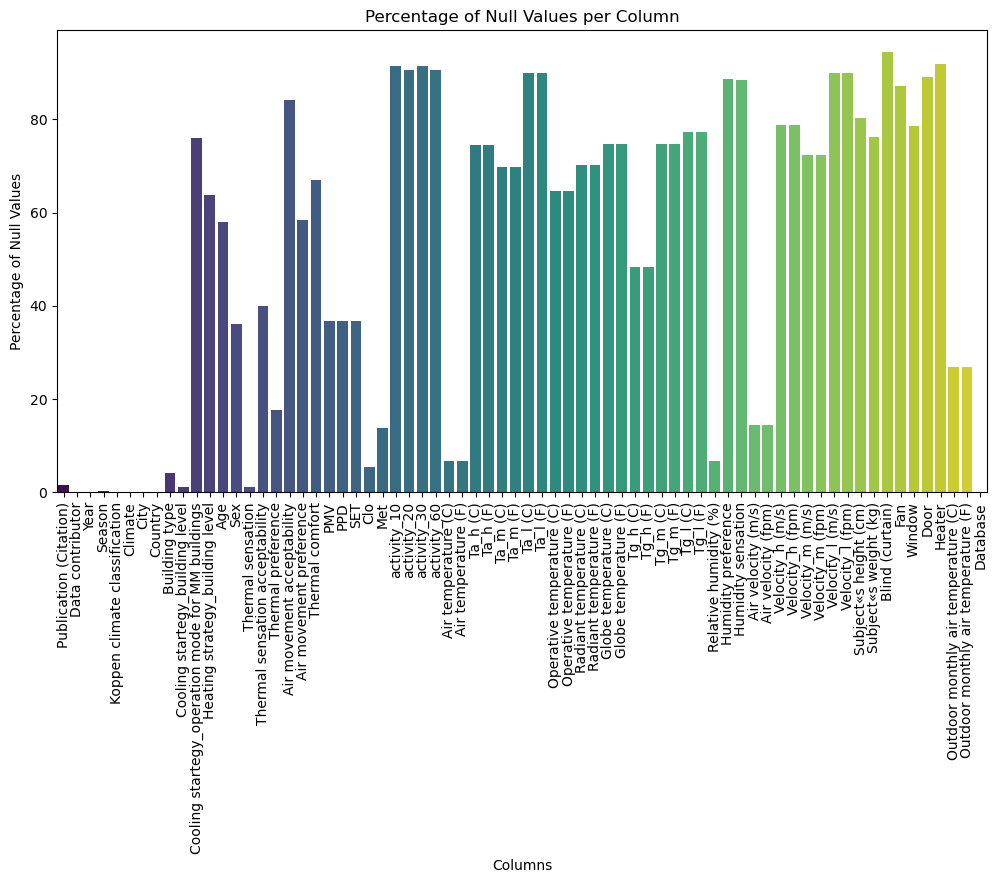

In [255]:
null_percent = df.isnull().mean() * 100

# Remove columns with more than 50% null values
df = df.loc[:, null_percent < 50]

# Plotting the count of null values per column
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percent.index, y=null_percent.values,palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values per Column')
plt.show()

In [256]:
class_counts = df['Thermal preference'].value_counts()
class_counts

Thermal preference
no change    42469
cooler       26895
warmer       14815
Name: count, dtype: int64

In [258]:
# Replace old class names with new names
df['Thermal preference'] = df['Thermal preference'].replace({
    'no change': 'Neutral',
    'cooler': 'Uncomfortable Cold',
    'warmer': 'Uncomfortable Warm'
})

# Now, get the updated class counts
class_counts = df['Thermal preference'].value_counts()
class_counts


Thermal preference
Neutral               42469
Uncomfortable Cold    26895
Uncomfortable Warm    14815
Name: count, dtype: int64

In [260]:
df = df.rename(columns={'Relative humidity (%)': 'Relative humidity'})
df = df.rename(columns={'Air velocity (m/s)': 'Air velocity'})
df = df.rename(columns={'Air temperature (C)':'Air temperature'})
df = df.rename(columns={'Outdoor monthly air temperature (C)':'Outdoor monthly air temperature '})

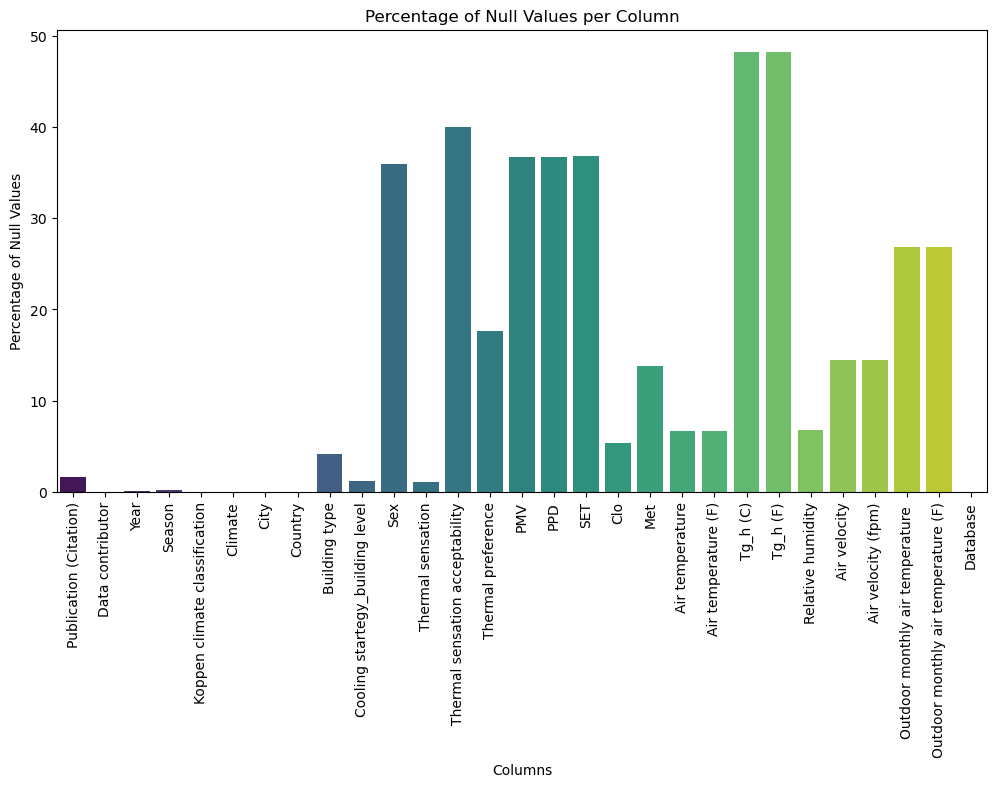

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame `df` assumed to be already defined

# Calculate the percentage of null values in each column
null_percent = df.isnull().mean() * 100

# Remove columns with more than 80% null values
df = df.loc[:, null_percent < 80]

# Plotting the count of null values per column
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percent.index, y=null_percent.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values per Column')
plt.show()


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102154 entries, 0 to 107582
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Publication (Citation)               100501 non-null  object 
 1   Data contributor                     102154 non-null  object 
 2   Year                                 102093 non-null  float64
 3   Season                               101923 non-null  object 
 4   Koppen climate classification        102154 non-null  object 
 5   Climate                              102154 non-null  object 
 6   City                                 102141 non-null  object 
 7   Country                              102154 non-null  object 
 8   Building type                        97961 non-null   object 
 9   Cooling startegy_building level      100972 non-null  object 
 10  Sex                                  65377 non-null   object 
 11  Thermal sensation 

In [264]:
df.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level', 'Sex',
       'Thermal sensation', 'Thermal sensation acceptability',
       'Thermal preference', 'PMV', 'PPD', 'SET', 'Clo', 'Met',
       'Air temperature', 'Air temperature (F)', 'Tg_h (C)', 'Tg_h (F)',
       'Relative humidity', 'Air velocity', 'Air velocity (fpm)',
       'Outdoor monthly air temperature ',
       'Outdoor monthly air temperature (F)', 'Database'],
      dtype='object')

In [266]:
new_columns = ['Season', 'Building type', 'Cooling startegy_building level','Climate','Thermal sensation','Koppen climate classification','Clo','Met','Thermal preference','Relative humidity','Air velocity','Country','Air temperature']  # Replace with your column names

new_df = df[new_columns]


In [267]:
new_df.head()

,Season,Building type,Cooling startegy_building level,Climate,Thermal sensation,Koppen climate classification,Clo,Met,Thermal preference,Relative humidity,Air velocity,Country,Air temperature
0,Summer,Classroom,Air Conditioned,Humid subtropical,-0.5,Cfa,0.25,NaN,Uncomfortable Warm,50.2,0.06,Japan,24.2
1,Summer,Classroom,Air Conditioned,Humid subtropical,-2.1,Cfa,0.25,NaN,Neutral,50.2,0.06,Japan,24.2
2,Summer,Classroom,Air Conditioned,Humid subtropical,0.5,Cfa,0.27,NaN,Neutral,50.2,0.06,Japan,24.2
3,Summer,Classroom,Air Conditioned,Humid subtropical,-2.5,Cfa,0.23,NaN,Neutral,50.2,0.06,Japan,24.2
4,Summer,Classroom,Air Conditioned,Humid subtropical,-0.5,Cfa,0.34,NaN,Neutral,50.2,0.06,Japan,24.2


In [269]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102154 entries, 0 to 107582
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Season                           101923 non-null  object 
 1   Building type                    97961 non-null   object 
 2   Cooling startegy_building level  100972 non-null  object 
 3   Climate                          102154 non-null  object 
 4   Thermal sensation                101013 non-null  float64
 5   Koppen climate classification    102154 non-null  object 
 6   Clo                              96725 non-null   float64
 7   Met                              88115 non-null   float64
 8   Thermal preference               84179 non-null   object 
 9   Relative humidity                95236 non-null   float64
 10  Air velocity                     87432 non-null   float64
 11  Country                          102154 non-null  object 
 12  Air tem

In [272]:
df_cleaned = new_df.dropna()


In [273]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61213 entries, 74 to 104038
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           61213 non-null  object 
 1   Building type                    61213 non-null  object 
 2   Cooling startegy_building level  61213 non-null  object 
 3   Climate                          61213 non-null  object 
 4   Thermal sensation                61213 non-null  float64
 5   Koppen climate classification    61213 non-null  object 
 6   Clo                              61213 non-null  float64
 7   Met                              61213 non-null  float64
 8   Thermal preference               61213 non-null  object 
 9   Relative humidity                61213 non-null  float64
 10  Air velocity                     61213 non-null  float64
 11  Country                          61213 non-null  object 
 12  Air temperature      

In [274]:
df_cleaned.isnull().sum()

Season                             0
Building type                      0
Cooling startegy_building level    0
Climate                            0
Thermal sensation                  0
Koppen climate classification      0
Clo                                0
Met                                0
Thermal preference                 0
Relative humidity                  0
Air velocity                       0
Country                            0
Air temperature                    0
dtype: int64

In [293]:
df_cleaned.to_csv('Ashrae_cleaned.csv', index=False)

In [294]:
df = pd.read_csv('Ashrae_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61213 entries, 0 to 61212
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           61213 non-null  object 
 1   Building type                    61213 non-null  object 
 2   Cooling startegy_building level  61213 non-null  object 
 3   Climate                          61213 non-null  object 
 4   Thermal sensation                61213 non-null  float64
 5   Koppen climate classification    61213 non-null  object 
 6   Clo                              61213 non-null  float64
 7   Met                              61213 non-null  float64
 8   Thermal preference               61213 non-null  object 
 9   Relative humidity                61213 non-null  float64
 10  Air velocity                     61213 non-null  float64
 11  Country                          61213 non-null  object 
 12  Air temperature   

In [297]:
df.isnull().sum()

Season                             0
Building type                      0
Cooling startegy_building level    0
Climate                            0
Thermal sensation                  0
Koppen climate classification      0
Clo                                0
Met                                0
Thermal preference                 0
Relative humidity                  0
Air velocity                       0
Country                            0
Air temperature                    0
dtype: int64